# Class Codes

## Binary Fission Algorithm 

9/7 Code

***
이 첫번째 코드는 $r$값이 고정되어 있다.
***

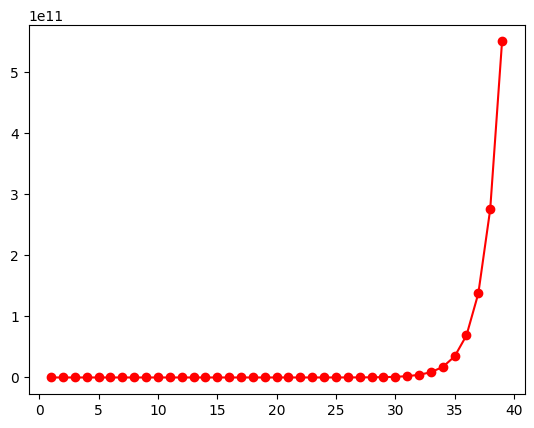

In [193]:
from numpy import *
from pylab import *

def f(r,n):
	y = (r**n - 1)/(r - 1)
	return y

x = []
y = []
z = []

for i in range (1, 40):
	y.append(f(2,i))
	x.append(i)
plot(x, y, '-or')

***
두번째 코드는 $ r= -(i-1)/19 + 2$ 를 사용하여 i에 따라 r 값을 변화시킨다.
***

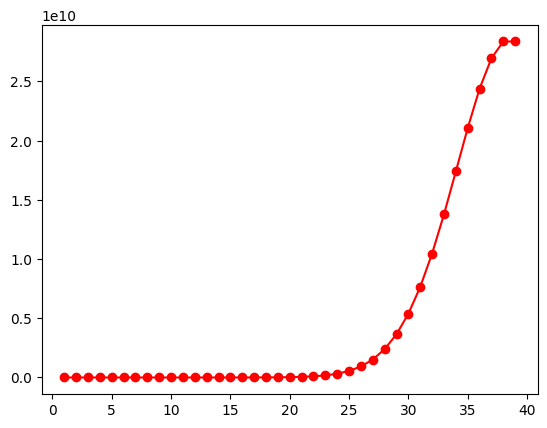

In [194]:
from numpy import *
from pylab import *

def f(r,n):
	y = (r**n - 1) / (r-1)
	return y

x = []
y = []
z = []

for i in range (1, 40):
	r = -(i-1)/19 + 2
	if i > 1 : 
		y.append(r*y[i-2] + y[i-2])
	else:
		y.append(f(r,i))
	x.append(i)
	z.append(r)
plot(x, y, '-or')

## SIR Model

9/12 code

Death는 아직 고려하지 않았다!

In [195]:
from numpy import *
from pylab import *

### Modeling

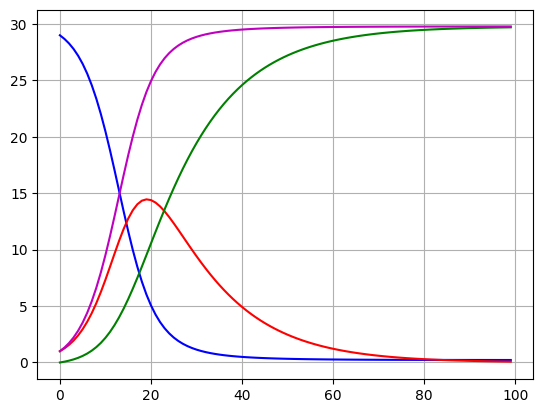

In [196]:
Nt = 30 # 전체 인구수
N = 100 # 시뮬레이션을 시행할 총 스텝 수
S = zeros(N) # 감염될 수 있는 사람들
I = zeros(N) # 감염된 사람들
R = zeros(N) # 회복된 사람들
CI = zeros(N) # 누적 감염자 수
Np = zeros(N) # 각 날의 새로운 감염자 수

day = zeros(N)
dt = 1 # delta t, dt = 1 이라는 것은 time interval이 1일이라는 뜻이다.

I[0] = 1 ; S[0] = 29 ; R[0] = 0 ; Np[0] = I[0] ; CI[0] = I[0]
beta = 1/3
gamma = 1/14

for d in range (1,N):
    # beta와 gamma가 원래는 gaussian random noise에 의해서 매일매일 조금씩 다르게 정해짐 , but 여기서는 앞에 0.0 을 곱해서 noise를 제거해주었다.
    beta0 = beta*(1 + 0.0 * randn())
    gamma0 = gamma*(1+ 0.0 * randn())
    S[d] = S[d-1] - dt * beta0 * I[d-1] * S[d-1] / Nt # 오일러 방식으로 처리한거
    I[d] = I[d-1] + dt * (beta0*I[d-1]*S[d-1]/Nt - gamma0 * I[d-1]) # 오일러 방식으로 처리한거
    R[d] = Nt - S[d] - I[d] # 변수 개수 줄이기!
    Np[d] = dt * beta0 * I[d-1] * S[d-1] / Nt # dS/dt 마이너스 붙여서 거기다가 dt 곱함
    CI[d] = CI[d-1] + Np[d] # 누적 감염자는 day d에 감염된 사람 합쳐서.
    day[d] = d

plot(day, S, '-b', day, I, '-r' , day, R, '-g' , day, CI, '-m')
grid()

### I를 최대화시키는 S

$\frac {dI} {dt} = 0$ 만족시켜야 하니까, $\beta \frac {SI} {N_0} = \gamma I$ 에서 $S(t^*) = \frac \gamma \beta N_0$ (Fixed)

In [197]:
Ss = gamma * Nt / beta ; print(Ss)

6.428571428571429


### 그때의 I

$$ I(t) + S(t) - \frac \gamma \beta N_0 \ln S(t) = I(0)+S(0) - \frac \gamma \beta N_0 \ln S(0)$$

이항시켜서 I(t) 만 남기고, 우리가 위에서 구한 Ss 이용해!

In [198]:
Is = I[0]+S[0] -Nt*gamma/beta*log(S[0]) - Ss + Nt*gamma/beta*log(Ss); print(Is)

13.886506140397707


### Daily new patient graph

<BarContainer object of 100 artists>

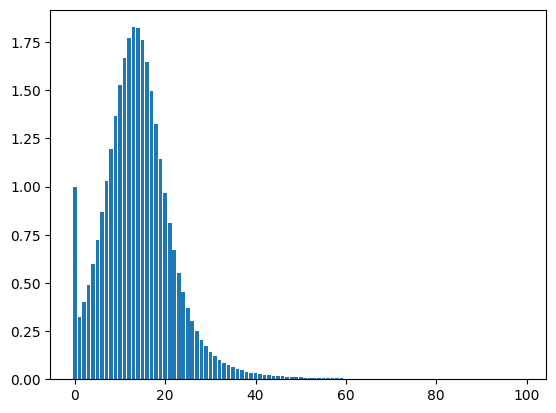

In [199]:
# bar plot for daily new patient population
bar(day, Np)

### S-I Graph
***
가운데 빨간 선이 S*
***

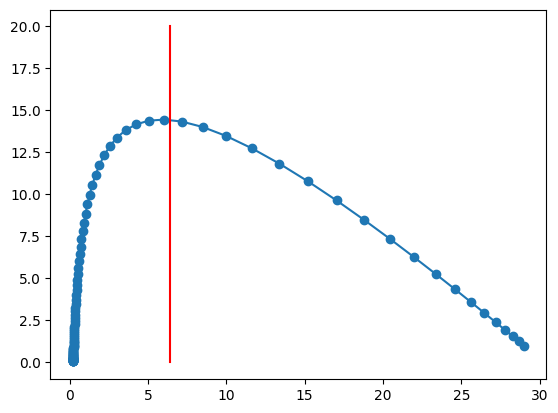

In [200]:
# phase diagram of S-I
plot(S, I, '-o', [Ss, Ss], [0, 20], '-r')

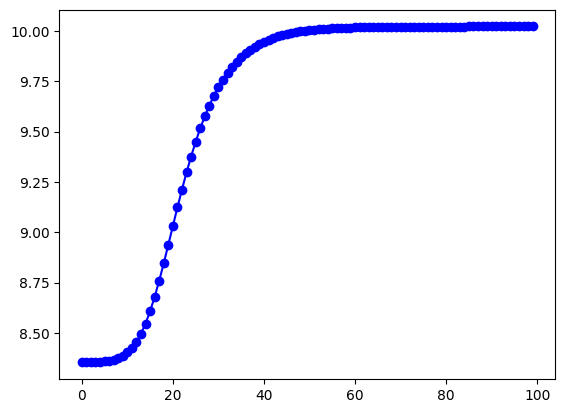

In [201]:
# checking if the conserved quantity is actually conserved
tmp = I + S - Nt*gamma/beta*log(S)
plot(day, tmp,'-ob')

## SIDR Model

9/19 code

Death 까지 추가로 고려!

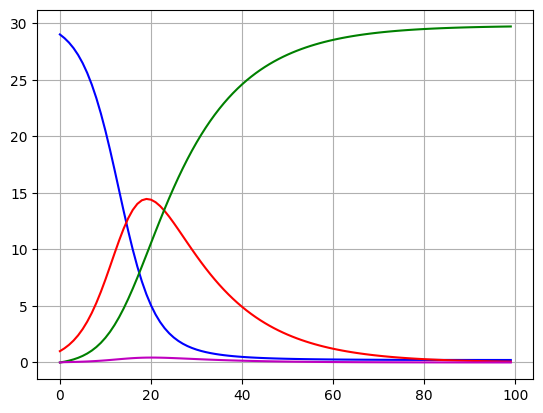

In [202]:
Nt = 30 # 전체 인구수
N = 100 # 시뮬레이션을 시행할 총 스텝 수
S = zeros(N) # 감염될 수 있는 사람들
I = zeros(N) # 감염된 사람들
R = zeros(N) # 회복된 사람들
CI = zeros(N) # 누적 감염자 수
Np = zeros(N) # 각 날의 새로운 감염자 수
Nd = zeros(N) # 각 날의 새로운 사망자 수
D = zeros(N)

day = zeros(N)
dt = 1 # delta t, dt = 1 이라는 것은 time interval이 1일이라는 뜻이다.

I[0] = 1 ; S[0] = 29 ; R[0] = 0 ; Np[0] = I[0] ; CI[0] = I[0]
beta = 1/3
gamma = 1/14
delta = 0.03 # 치사율이 3%다 이거지.

for d in range (1,N):
    # beta와 gamma가 원래는 gaussian random noise에 의해서 매일매일 조금씩 다르게 정해짐 , but 여기서는 앞에 0.0 을 곱해서 noise를 제거해주었다.
    beta0 = beta*(1 + 0.0 * randn())
    gamma0 = gamma*(1+ 0.0 * randn())
    S[d] = S[d-1] - dt * beta0 * I[d-1] * S[d-1] / Nt # 오일러 방식으로 처리한거
    I[d] = I[d-1] + dt * (beta0*I[d-1]*S[d-1]/Nt - gamma0 * I[d-1]) # 오일러 방식으로 처리한거
    R[d] = R[d-1] + dt*gamma*I[d-1] # dR/dt = \gamma I 니까.
    D[d] = Nt - S[d] - I[d] - R[d] # 변수 개수 줄이기
    Nd[d] = delta * I[d-1]
    Np[d] = dt * beta0 * I[d-1] * S[d-1] / Nt # dS/dt 마이너스 붙여서 거기다가 dt 곱함
    CI[d] = CI[d-1] + Np[d] # 누적 감염자는 day d에 감염된 사람 합쳐서.
    day[d] = d

plot(day, S, '-b', day, I, '-r' , day, R, '-g' , day, Nd, '-m')
grid()

### 각 일 사망자 수

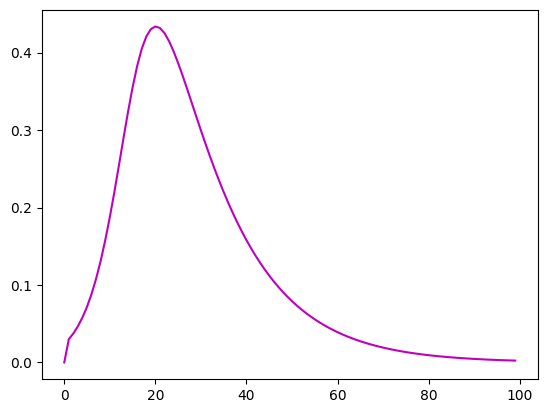

In [203]:
plot(day, Nd, '-m')

## 각 국가 코로나 사망률 구하기

In [204]:
from pandas import *

corona = read_csv('Corona_data_03_24_2020.csv')
corona.head(20)

,Country,Total,Total death,Total Recovered,Active,"Serious, Cricital"
0,China,"81,171","3,277","73,159","4,735","1,573"
1,Italy,"69,176","6,820","8,326","54,030","3,393"
2,USA,"52,878",682,370,"51,826","1,175"
3,Spain,"39,676","2,800","3,794","33,082","2,355"
4,Germany,"32,781",157,"3,243","29,381",23
5,Iran,"24,811","1,934","8,913","13,964",NaN
6,France,"22,304","1,100","3,281","17,923","2,516"
7,Switzerland,"9,877",122,131,"9,624",141
8,S. Korea,"9,037",120,"3,507","5,410",59
9,UK,"8,077",422,135,"7,520",20


In [205]:
arr = corona.to_numpy()

In [206]:
death_rate = zeros(19)
for i in range(19):
    death = arr[i,2] ; total = arr[i,1]
    death_rate[i] = int(death.replace(',',''))/int(total.replace(',',''))

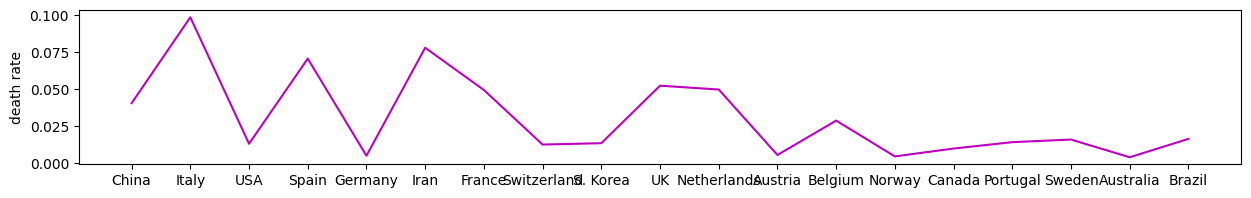

In [207]:
figure(figsize = (15,2))
plot(death_rate, '-m')
ylabel('death rate')
xticks(arange(19), arr[0:19,0])
show()

### Delta 구하기

***
각 국가에서 구한 치사율 평균 내서 구해봤다.
***

In [208]:
delta = mean(death_rate)
print (delta)

0.030499735148587642


## Particle Model

In [209]:
N = 30
T = 150
x = zeros(N) # x축
y = zeros(N) # y축
vx = zeros(N)
vy = zeros(N)
s = zeros(N) # s = 0 : susceptible, s = 1 : infected, s = 2 : recovered
R = zeros(N) # number of infected stage, if s = 1 , R = R_ 1 (감염된 개체가 얼마나 오래 감염되었는지)
Ic = zeros(T) # 누적 감염자 수
recovery = 25 # 회복에 필요한 시간
dt = 1 # 시간 흘러가는 단위 1 로 설정
speed = 0.01 # 개체의 이동 속도
distance = 0.03 # 감염이 전파될 수 있는 거리

In [210]:
def dist(p,q):
    tmp = sqrt ((p[0]-q[0])**2 + (p[1]-q[1])**2) # R2 거리 이용해서 두 개체 p와 q 사이의 거리를 계산한다.
    return tmp

### 개체 초기화

- 각 개체의 초기 위치는 무작위로 설정된다.
- 각 개체의 초기 속도 방향도 무작위로 설정된다.
- 첫번째 개체 ('x[0], y[0]') 은 감염되어 있는 상태.

In [211]:
for p in range(N):
    x[p] = rand()/2 # 위치
    y[p] = rand()/2 # 위치
    theta = 2*pi*rand() # 초기 속도 방향 설정
    vx[p] = speed * cos(theta)
    vy[p] = speed * sin(theta)

x[0] = 0.25 ; y[0] = 0.25 ; s[0] = 1

### Simulation

- 각 시간 단계마다 다음과 같은 작업을 수행한다.

> 개체 이동 : 각 개체의 위치는 해당 속도와 방향에 따라 업데이트 된다.

> 경계 조건 : 개체가 특정 영역 ($\Omega$) 를 넘어가버리면, 방향을 변경한다.

> 감염 전파 : 감염된 개체와 미감염 개체 간의 거리가 특정 값('distance') 이하 이면 감염이 전파된다.

> 누적 감염자 수 업데이트

In [ ]:
for t in range(1,T):
    for p in range(N):
        # 개체 이동 : 각 시간단계 t에서 모든 개체 p에 대해 위치를 업데이트한다.
        # 이 업데이트는 개체의 현재 속도('vx[p]', 'vy[p]')에 따라 일어나며, dt는 시간 간격을 나타냄.
        x[p] = x[p] + dt*vx[p]
        y[p] = y[p] + dt*vy[p]
        
        # 경계 조건 : 개체가 특정 영역 (0.05~0.45) 를 벗어나면, 그 방향을 반대로 한다. 이는 개체가 벽에 부딪힐 때, 반사되는 것처럼 동작.
        if x[p] >= 0.45 :
            vx[p] = -abs(vx[p])
        elif x[p] <= 0.05 :
            vx[p] = abs(vx[p])
        if y[p] >= 0.45 :
            vy[p] = -abs(vy[p])
        elif y[p] <= 0.05 :
            vy[p] = abs(vy[p])
        
    stmp = zeros(N) # 각 개체의 임시 상태를 저장하기 위한 배열
    stmp = s # 현재 상태 s를 stmp에 복사한다. 왜 이렇게 하냐면, 감염 전파를 동시에 처리하면서 원래 상태 s를 바꾸면 결과에 영향을 줄 수 있으므로.
    newinfection = 0
    
    # 모든 개체 쌍 (p,q) 에 대해 모두 감염 전파 가능성을 확인한다.
    for p in range(N):
        for q in range(N) :
            if s[p] == 1 and s[q] == 0: # 개체 p가 감염되어 있고, 개체 q가 미감염 상태일 때만 전파 가능성을 확인하도록 조건문을 달아놨음.
                pc = [x[p], y[p]] # 개체 p의 위치
                qc = [x[q], y[q]] # 개체 q의 위치
                tmp = dist(pc,qc) # 두 개체 사이의 거리
                if tmp <= distance: # 만약 이 거리가 'distance'보다 작거나 같으면, 개체 'q'는 감염된다. ('stmp[q] = 1')
                    stmp[q] = 1
                    newinfection += 1   # 해당 시간에 새로 감염된 개체의 수도 포함해서 기록
    
    s = stmp # 전파 단계가 끝나면, 임시 상태였던 stmp를 실제 상태 s에 복사하여 상태를 업데이트.
    Ic[t] = Ic[t-1] + newinfection # 누적감염자수에 newinfection 추가

    # recovery function

    for p in range(N):
        if s[p] == 1:
            R[p] += 1 # 각 개체 p에 대해 , 만약 해당 개첵라 감염상태(s[p] = 1) 이면, 그 개체의 감염된 시간을 나타내는 R[p] 값을 1 증가시킨다.
        if s[p] == 1 and R[p] > recovery:
            s[p] = 2 # infected 상태였다가, recovery 기간이 넘으면 recovered 상태로 전환

        # 코드에서 s[p] = 2 인 상태의 개체가 다시 감염되는 로직이 없기 때문에, 회복된 개체는 다시 감염되지 않는다.

    clf()
    for p in range(N):
        if s[p] == 0:
            plot(x[p], y[p], 'bo')
        elif s[p] == 1:
            plot(x[p], y[p], 'ro')
        else :
            plot(x[p], y[p], 'go')

    axis((-0.01, 0.51, -0.01, 0.51))
    text(0.45, 0.45, r'Day', fontsize = 15)
    text(0.45, 0.4, t, fontsize = 15)
    pause(0.1)

%matplotlib inline


## 1D Cellular Automata

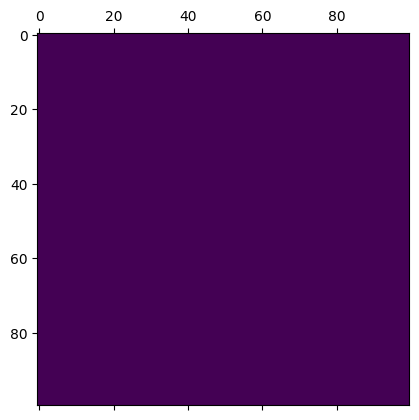

In [212]:
N = 100 # Cell의 개수
T = 100 # 시간 스텝 수
D = zeros((T,N)) # D = status , 각 시간 스텝에서의 셀 상태를 나타내는 2D 배열.

# 각 셀에 대하여 무작위로 초기 상태 (0 또는 1) 을 설정한다.
for p in range(N):
    tmp = randint(0,1)
    D[0,p] = tmp


# 이전 시간 스텝의 셀 상태를 기반으로, 현재 셀 상태를 업데이트한다. 어떤 셀의 좌/우 이웃 중 하나라도 상태가 1이거나, 해당 셀의 상태가 1이라면, 현재 셀의 상태를 1로 설정.
for t in range(1,T):
    for p in range(1, N-1):
        if D[t-1, p-1] == 1 or D[t-1, p+1] == 1:
            D[t,p] = 1
        elif D[t-1, p] == 1:
            D[t,p] = 1

matshow(D)

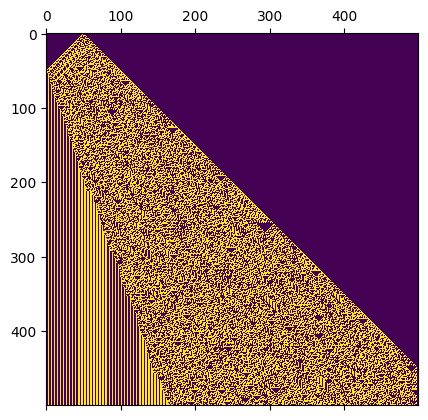

In [213]:
N = 500
T = 500
D = zeros((T,N))
# for p in range(N):
# tmp = randint(0,2)
# D[0,p] = tmp
D[0,50] = 1
for t in range(1, T):
    for p in range(1, N-1):
        tmp = list(D[t-1,p-1:p+2])
        if tmp == [1, 1, 1]:
            D[t,p] = 0
        elif tmp == [1, 1, 0]:
            D[t,p] = 0
        elif tmp == [1, 0, 1]:
            D[t,p] = 0
        elif tmp == [1, 0, 0]:
            D[t,p] = 1
        elif tmp == [0, 1, 1]:
            D[t,p] = 1
        elif tmp == [0, 1, 0]:
            D[t,p] = 1
        elif tmp == [0, 0, 1]:
            D[t,p] = 1
        else:
            D[t,p] = 0

matshow(D)
            

## 2D Cellular Automata

### 초기 설정

- Nr, Nc는 각각 행과 열의 수입니다. 이는 시뮬레이션 그리드의 크기를 나타냅니다.
- T는 총 시간 스텝의 수입니다.
- recovery는 회복까지 걸리는 시간입니다.
- N은 그리드의 총 셀 수입니다.
- s는 현재의 감염 상태를 나타내는 그리드입니다. 값이 0이면 건강, 1이면 감염, 2면 회복된 상태를 의미합니다.
- R는 감염된 후 경과된 시간을 나타내는 그리드입니다.
- SP, RP, IP, NP는 시간 스텝별로 각 상태의 개수를 추적하기 위한 배열입니다.
- sd는 감염 확률을 조정하는 계수입니다.

In [214]:
Nr = 200; Nc = 200; T = 100
recovery = 14
N = Nr * Nc
s = zeros((Nr, Nc))
R = zeros((Nr, Nc))
SP = zeros(T)
RP = zeros(T)
IP = zeros(T)
NP = zeros(T)
sd = 0.5


### 초기 감염자 설정

In [215]:
# 20명의 초기 감염자를 임의의 위치에 배치합니다.
for i in range(20):
    indr = randint(1,Nr-2)
    indc = randint(1,Nc-2)
    s[indr,indc] = 1
    R[indr,indc] = 1


### 전염병 확산 시뮬레이션

#### 시뮬레이션의 각 스텝에서 초기화

D는 다음 시간 스텝에서의 상태를 저장할 그리드입니다. 현재 스텝의 상태는 s에 저장되어 있으며, 이를 기반으로 D를 업데이트합니다.

In [216]:
D = zeros((Nr, Nc))

#### 각 셀의 상태 검사 및 업데이트

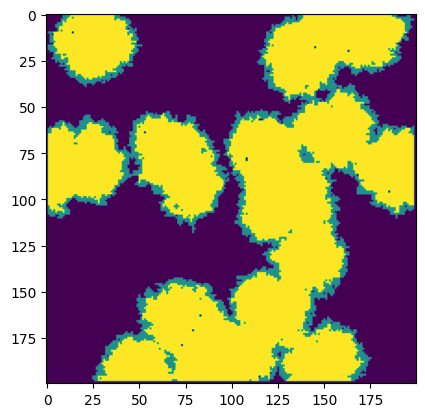

In [217]:
for t in range(1, T):  # 각 시간 단계에 대하여
    # D를 s의 현재 상태로 초기화합니다.
    for i in range(Nc):  # 각 열에 대하여
        for j in range(Nr):  # 각 행에 대하여
            D[i, j] = s[i, j]  # 현재 상태를 D에 복사

    # 각 셀에 대해 주변 셀을 확인하고 업데이트합니다.
    for i in range(1, Nc-1):  # 열의 테두리를 제외하고
        for j in range(1, Nr-1):  # 행의 테두리를 제외하고

            # 현재 셀이 감염되지 않았다면
            if s[i, j] == 0:
                num_inf = 0
                # 주변 셀의 상태를 확인하여 감염된 셀의 수를 세기
                for n in [s[i+1, j], s[i-1, j], s[i, j+1], s[i, j-1]]:
                    if n == 1:
                        num_inf = num_inf + 1
                # 감염될 확률을 계산 (감염된 이웃의 비율에 sd를 곱함)
                p = num_inf / 4 * sd
                tmp = rand()  # 0과 1 사이의 난수 생성
                # 확률에 따라 현재 셀을 감염시키기
                if tmp <= p:
                    D[i, j] = 1  # 현재 셀을 감염된 상태로 변경
                    NP[t] = NP[t] + 1  # 감염된 셀의 수 증가
                    R[i, j] = 1  # 감염 시간을 1로 초기화

            # 현재 셀이 이미 감염되었다면
            if s[i, j] == 1:
                R[i, j] = R[i, j] + 1  # 감염 시간 증가
                R[i, j] = min(recovery, R[i, j])  # 최대 회복 시간으로 제한
            # 현재 셀이 회복 시간에 도달했다면
            if R[i, j] == recovery:
                D[i, j] = 2  # 현재 셀을 회복된 상태로 변경

    # s를 D의 상태로 업데이트합니다.
    for i in range(Nc):
        for j in range(Nr):
            s[i, j] = D[i, j]

# 시각화 부분
clf()  # 이전 그래프를 지우기
imshow(s, vmin=0, vmax=2)  # 현재 상태를 이미지로 표시 (0: 감염되지 않음, 1: 감염됨, 2: 회복됨)
pause(0.1)  # 간단한 대기


## Random versus Chaotic Data
Sometimes, we use the words “random” and “chaos” without distinction.

Random versus Chaos

Random = stochastic system

Chaos = chaotic system = deterministic

Text(0, 0.5, 'population')

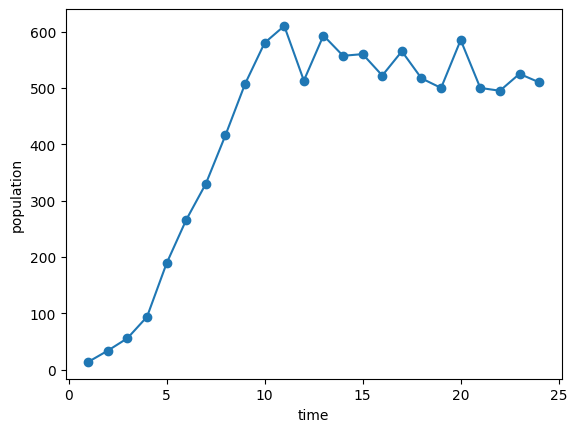

In [218]:
g = loadtxt('paramecium.txt')
t = g[:,0]
y = g[:,1]
plot(t, y, '-o')
xlabel('time')
ylabel('population')

## 1D random walk

In [ ]:
# 라이브러리 임포트
from random import *

# 첫 번째 파트: 100개 입자로 1D 랜덤 워크 시뮬레이션

# 상수 설정
Np = 100  # 입자의 수
Nf = 100  # 프레임의 수

# 입자들의 초기 위치 설정
Px = zeros(Np)  # 각 입자의 위치를 저장할 배열 (numpy 함수를 사용)

# 1D 랜덤 워크 시뮬레이션
for time in range(Nf):
    for p in range(Np):
        R = random()  # 0과 1 사이의 무작위 숫자 생성
        if R <= 0.5:
            Px[p] = Px[p] + 1  # 입자를 오른쪽으로 이동
        else:
            Px[p] = Px[p] - 1  # 입자를 왼쪽으로 이동

    # 입자들의 현재 위치 그래프로 표시
    clf()  # 그래프를 클리어 (matplotlib 함수)
    plot(Px, linspace(-1, 1, Np), 'mo')  # 입자들의 위치를 그래프로 그림
    axis((-100, 100, -1, 1))
    pause(0.001)  # 잠시 일시 정지 (matplotlib 함수)


In [ ]:
# 두 번째 파트: 10,000개 입자로 1D 랜덤 워크 시뮬레이션 및 평균 및 분산 계산

# 상수 재설정
Np = 10000  # 입자의 수
Nf = 200    # 프레임의 수

# 초기화
Px = zeros(Np)
Ptotal = zeros((Nf, Np))
Vtotal = zeros(Nf)
Mtotal = zeros(Nf)

# 1D 랜덤 워크 시뮬레이션 및 통계 계산
for time in range(Nf):
    for p in range(Np):
        R = random()
        if R <= 0.5:
            Px[p] = Px[p] + 1
        else:
            Px[p] = Px[p] - 1

    avePx = mean(Px)  # 입자들의 평균 위치 계산
    varPx = mean(Px*Px) - avePx*avePx  # 위치의 분산 계산

    Ptotal[time, :] = Px[:]
    Vtotal[time] = varPx

    # 현재 프레임의 평균 및 분산 그래프로 표시
    plot(time, avePx, 'm.')  # 평균 위치 그래프
    plot(time, varPx, 'b.')  # 분산 그래프
    pause(0.001)



In [ ]:
# 모든 입자의 워크 히스토리 그래프로 표시
xlabel('time')  # x축 라벨 설정
ylabel('Average, Variance')  # y축 라벨 설정
for p in range(Np):
    plot(Ptotal[:, p], '-b')  # 각 입자의 워크 히스토리
plot(sqrt(Vtotal[:]), '-r')  # 분산의 양의 제곱근
plot(-sqrt(Vtotal[:]), '-r')  # 분산의 음의 제곱근
plot(Mtotal[:], '-m')  # 평균 위치

In [ ]:
# plot the particle distribution at the final time
hist(Px, bins=100, edgecolor="green", color="blue")

## Random Walk

### Matching Gaussian

In [219]:
Np = 50000 # Walk의 총 수
Nf = 100 # Walk의 총 시간, 즉 스텝의 수
Px = zeros(Np) # 현재 위치의 배열, 초기에는 모든 위치가 0임.
P = zeros((Np,Nf)) # 각 워크의 시간에 따른 위치를 저장하는 2D 배열

for time in range(Nf):
    for p in range(Np):
        R = random()
        if R <= 0.5: # 생성된 랜덤 숫자가 0.5 이하인 경우 - 오른쪽으로 한 칸 간다.
            Px[p] = Px[p] + 1
        else: # 그 외에는 왼쪽으로 간다.
            Px[p] = Px[p] - 1
        
    
    P[:,time] = Px # position을 저장.
    avePx = mean(Px) # Nf번 만큼 step 진행했을 때, 위치(position)의 평균.
    varPx = mean(Px*Px) - avePx**2 # Nf번 만큼 step 진행했을 때, 위치에 대한 분산.

### Distribution

- Using Normal Distribution

이 random distribution이 Gaussian distribution과 같은지를 체크해보고 싶음.

In [ ]:
Ds = zeros((2*Nf + 1, Nf))
In = P + Nf
In = In.astype('int')
for k in range(Nf):
    for j in range(Np):
        Ds[In[j,k],k] = Ds[In[j,k],k] + 1
    clf()
    mu = sum(P[:,k])/Np
    VarPx = sum(P[:,k]**2)/Np - mu**2
    sig = sqrt(varPx)
    xi = linspace(-Nf, Nf, 1000)
    f = 1/sig/sqrt(2*pi)*exp(-0.5*((xi-mu)/sig)**2)
    plot(linspace(-Nf,Nf,2*N+1), Ds[:,k]/Np, 'm.', xi,f,'-b')
    pause(0.01)

## Chaotic Map

### Discrete Logistic Map (Chaotic Map)

#### Logistic Function

In [220]:
def g(r,x):
    tmp = r*x*(1-x)
    return tmp

In [ ]:
x = linspace(0,1)
r = 3.8
y = r*x*(1-x)
yy = x
plot(x,y,'-b', x,yy, '-r')

p0 = 0.8 # initial population
for i in range(100) :
    p1 = g(r,p0)
    plot([p0,p0], [p0,p1], '-ro')
    plot([p0,p1], [p1,p1], '-go')
    p0 = p1
    pause(0.5)

### Feigenbaum diagram

Text(0, 0.5, 'x')

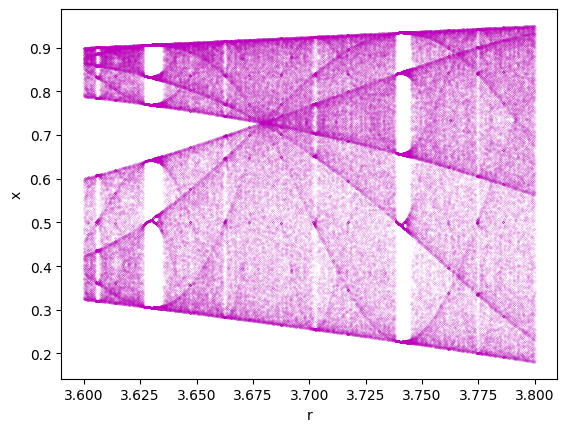

In [221]:
xo = 0.1
r = linspace(3.6, 3.8, 1000)
x = r*0 + xo
for k in range(500):
    x = r*x*(1-x)
    if k >= 300:
        plot(r,x,'m.', markersize = 0.1)

xlabel('r')
ylabel('x')

### Trajectory versus time

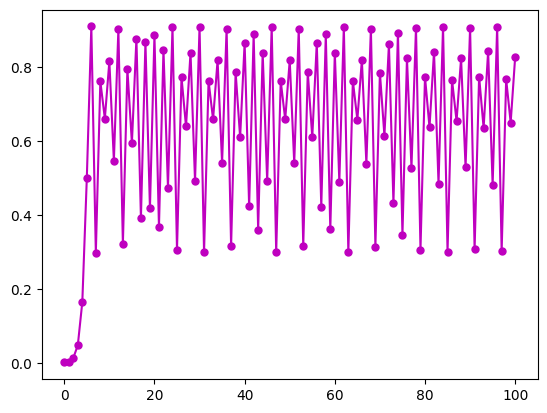

In [222]:
xo = 0.001
x = []
x.append(xo)

r = 3.64

time = []
time.append(0)
for k in range(100):
    time.append(k+1)
    xo = r*xo*(1-xo)
    x.append(xo)

plot(time, x, 'mo-', markersize = 5)

### Initial population with small perturbation

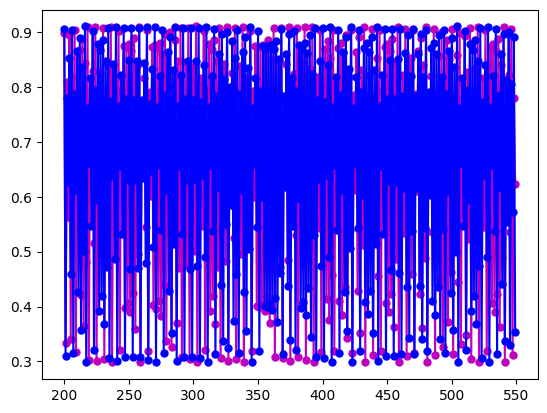

In [223]:
xo = 0.3
yo = 0.3 + 10**(-9)
x = []
y = []

r = 3.64

time = []

for k in range(550):
    xo = r*xo*(1-xo) # logistic
    yo = r*yo*(1-yo) # logistic
    if k >= 200 :
        time.append(k)
        x.append(xo)
        y.append(yo)

plot(time, x, 'mo-', time, y, 'bo-', markersize = 5)

(array([34., 11.,  5.,  9., 10., 11.,  8.,  5.,  8.,  9.,  4., 11.,  6.,
         3.,  8.,  7., 10., 16.,  0.,  0.,  0.,  0., 13., 19., 11., 18.,
        20., 17., 28., 49.]),
 array([0.29812244, 0.31851828, 0.33891413, 0.35930998, 0.37970582,
        0.40010167, 0.42049752, 0.44089336, 0.46128921, 0.48168506,
        0.50208091, 0.52247675, 0.5428726 , 0.56326845, 0.58366429,
        0.60406014, 0.62445599, 0.64485183, 0.66524768, 0.68564353,
        0.70603937, 0.72643522, 0.74683107, 0.76722692, 0.78762276,
        0.80801861, 0.82841446, 0.8488103 , 0.86920615, 0.889602  ,
        0.90999784]),
 <BarContainer object of 30 artists>)

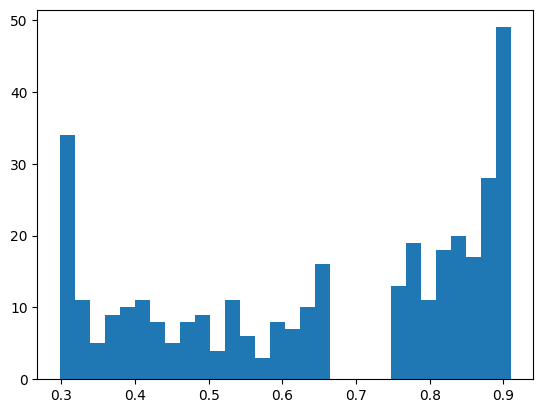

In [224]:
hist(x, bins = 30, label = 'bins=30')

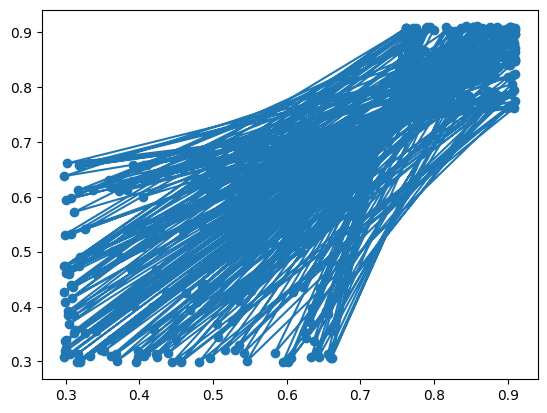

In [225]:
plot(x,y, '-o')

여기까지 chaotic process 에 대해서 작은 perturbation이 어떤 영향을 미치는지 알아봄.

### Gaussian process에서의 small perturbation 적용

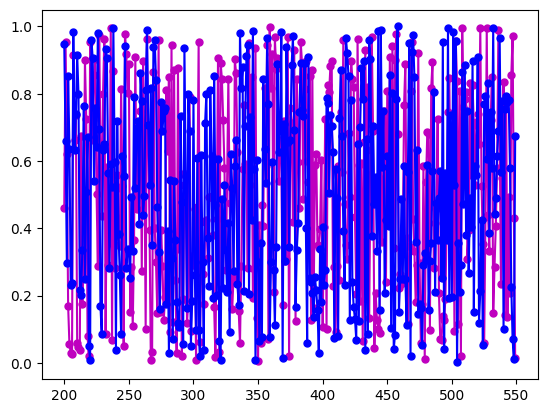

In [226]:
# Gaussian process
# x with a small perturbation = y
r = 3.64 # contains all hidden information of the system
r = 3.64
xo = 0.3
yo = 0.3 + 10**-9
x1 = []
y1 = []
time = []
for k in range(550):
    xo = rand()
    yo = rand()
    if k >=200:
        time.append(k)
        x1.append(xo)
        y1.append(yo)
plot(time, x1, 'mo-', time, y1, 'bo-', markersize=5)

(array([36.,  9., 12.,  4.,  8.,  8., 13.,  2., 11.,  6.,  5., 10.,  8.,
         1.,  7., 10., 13., 12.,  0.,  0.,  0.,  0., 11., 24.,  8., 18.,
        19., 21., 17., 57.]),
 array([0.29811847, 0.31851449, 0.33891051, 0.35930654, 0.37970256,
        0.40009859, 0.42049461, 0.44089063, 0.46128666, 0.48168268,
        0.5020787 , 0.52247473, 0.54287075, 0.56326677, 0.5836628 ,
        0.60405882, 0.62445484, 0.64485087, 0.66524689, 0.68564291,
        0.70603894, 0.72643496, 0.74683099, 0.76722701, 0.78762303,
        0.80801906, 0.82841508, 0.8488111 , 0.86920713, 0.88960315,
        0.90999917]),
 <BarContainer object of 30 artists>)

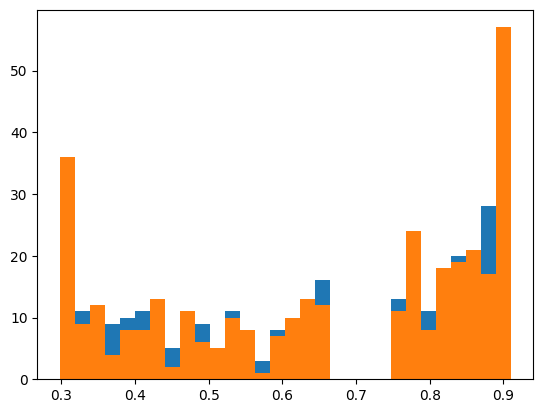

In [227]:
hist(x, bins = 30, label = 'bins=30')
hist(y, bins = 30, label = 'bins=30')

### Butterfly Effects

Text(0, 0.5, 'Log10 dxy')

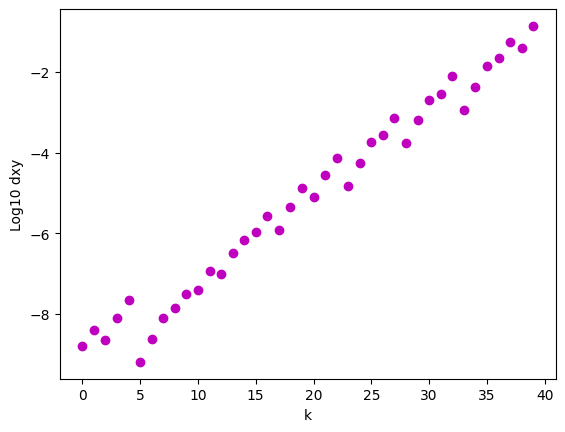

In [228]:
xo = 0.3
yo = xo + 10**-9
dxy = yo - xo
r = 3.92
for k in range(40):
    xo = r*xo*(1-xo)
    yo = r*yo*(1-yo)
    dxy = abs(xo-yo)
    plot(k, log10(dxy), 'mo')
xlabel('k')
ylabel('Log10 dxy')

###  complexity
to check the complexity, try to find the roots


In [229]:
def quad(a,b,c):
    ind = int(size(c))
    x = zeros(2*ind)
    for i in range(0,ind):
        delta = sqrt(b**2 - 4*a*c[i])
        if delta >=0:
            root1 = (-b + delta)/2/a
            root2 = (-b - delta)/2/a
        if root1>=0 and root1<=1:
            x[2*i] = root1
        if root2>=0 and root2<=1:
            x[2*i+1] = root2
    return x

In [230]:
# test problem
r = 3.9
r = 2.8
xo = 0.3
m = 20
print(0, xo)
for i in range(1,m):
    xo = r*xo*(1-xo)
    print(i, xo)

print('==========')
x = [xo]
for i in range(0,m-1):
    x = quad(r, -r, x)
    print(i, x)

0 0.3
1 0.588
2 0.6783168
3 0.6109687327457278
4 0.6655206329878602
5 0.6232881761548346
6 0.6574400717371606
7 0.6305953466719136
8 0.6522455951973996
9 0.6350995804803706
10 0.6488946893912779
11 0.6379250401190096
12 0.6467347132628748
13 0.6397129869862533
14 0.6453447875486611
15 0.6408496996508167
16 0.6444518139031691
17 0.6415742856882357
18 0.6438788205692243
19 0.6420368779765051
0 [0.64387882 0.35612118]
1 [0.64157429 0.35842571 0.85044809 0.14955191]
2 [0.64445181 0.35554819 0.84927184 0.15072816 0.84927184 0.15072816
 0.94338313 0.05661687]
3 [0.6408497  0.3591503  0.85073994 0.14926006 0.85073994 0.14926006
 0.94290915 0.05709085 0.94290915 0.05709085 0.94290915 0.05709085
 0.94290915 0.05709085 0.97935341 0.02064659]
4 [0.64534479 0.35465521 0.84890118 0.15109882 0.84890118 0.15109882
 0.94350066 0.05649934 0.94350066 0.05649934 0.94350066 0.05649934
 0.94350066 0.05649934 0.9791768  0.0208232  0.9791768  0.0208232
 0.9791768  0.0208232  0.9791768  0.0208232  0.9791768  

/var/folders/8l/d0_bj06x2czf46y6_p5zswgr0000gn/T/ipykernel_83656/3282520227.py:5: RuntimeWarning: invalid value encountered in sqrt
  delta = sqrt(b**2 - 4*a*c[i])


16 [6.78316800e-01 3.21683200e-01 8.33257050e-01 ... 9.07261839e-08
 9.99999968e-01 3.21241770e-08]
17 [5.88000000e-01 4.12000000e-01 8.67577397e-01 ... 3.24022096e-08
 9.99999989e-01 1.14729205e-08]
18 [7.00000000e-01 3.00000000e-01 8.20713490e-01 ... 1.15722179e-08
 9.99999996e-01 4.09747165e-09]


# Central limit theorem
In probability theory, the central limit theorem (CLT) establishes that, in many situations, for independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

Text(0, 0.5, 'Error of each sample mean in log scale')

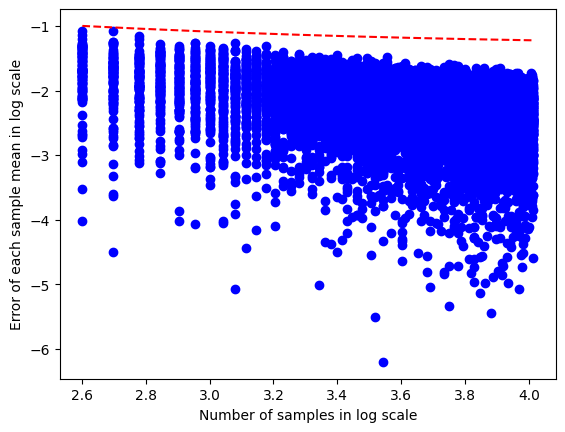

In [239]:
# if entire population, then the mean = 0
# mean(z) = 0
# we use small "sample" to predict
# question is what is the best strategy to choose random samples # we conduct some experiments in the following
mu = 0 # exact mean value
M = 300
dM = 100
Error = [] # error about mean; exact mean = 0
MM = [] # sample number
for i in range(100):
    M = M + dM
    for j in range(100): # Try different values of j (20, choose >20)
        sum1 = 0
        for k in range(M):
            x = -1+(randint(1,N)-1)*2/(N-1)
            sum1 = sum1 + x
        s_mu = sum1/M
        err = abs(mu - s_mu)
        MM.append(M)
        Error.append(err)

plot(log10(MM), log10(Error), 'ob')
y = 1/sqrt(MM)+10**(-1.)-1/sqrt(MM[0])
plot(log10(MM), log10(y),'--r')

xlabel('Number of samples in log scale')
ylabel('Error of each sample mean in log scale')

In [240]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(log10(MM), log10(Error))
print("Slope:", slope)

Slope: -0.48318485252344345


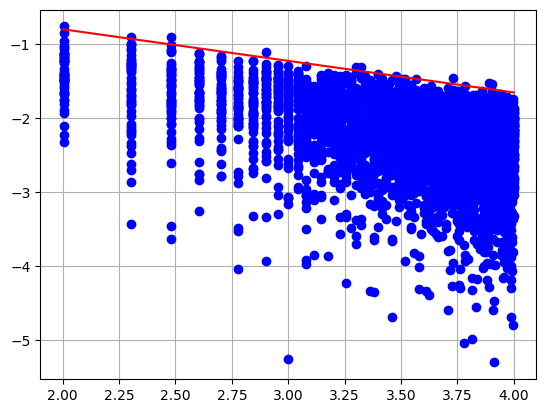

In [238]:
N= 1
Nv = []
SMean = []
x = np.linspace(2,4)
for i in range(100):
    N += 100
    for _ in range(50):
        k = 2*np.random.rand(N,1)-1
        u = np.exp(k)
        s_mean = np.sum(u)/N
        mu = (e-(e**(-1)))/2
        E = abs(s_mean-mu)
        plt.plot(log10(N), log10(E), 'ob')
y = (-0.42652348570492042)*(x-2) -0.8
plt.plot(x, y, 'r')
plt.grid()
plt.show()

### Polynomial Chaos

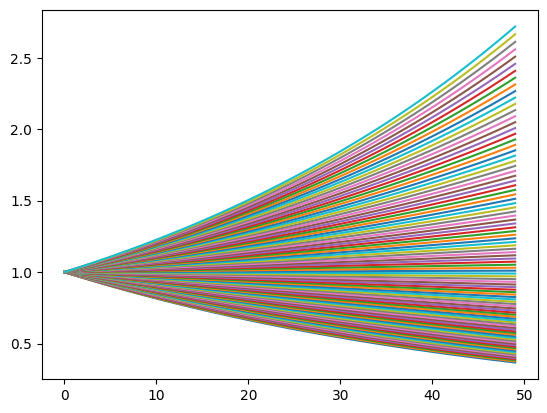

In [233]:
def n(k, t):
    ns = exp(k*t)
    return ns
N = 100
M = 50 # size of t
K = linspace(-1, 1, N) # N size of uniform k
t = linspace(0,1,M) # t = [0,1]
sample = []
for k in K:
    ns = n
    sample.append(n(k,t))
    plot(sample[-1])

In [234]:
N = 100
M = 50 # t? size
K = linspace(-1, 1, N)
t = linspace(0,1,M)
sample = []
T = []
for k in K:
    ns = n
    sample.append(n(k,t))
    T.append(sample[-1][-1])
Ta = np.array(T)
print ("mean:", str(Ta.mean()))
print ("variance:", str(var(Ta)))
print ("variance:" + str(Ta.var()))

mean: 1.1789195568501276
variance: 0.4433107636506465
variance:0.4433107636506465
